### Logistic regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [298]:
train_data = np.loadtxt("./ex2data1.txt", delimiter=",")

print(train_data[:5,:])

[[34.62365962 78.02469282  0.        ]
 [30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]]


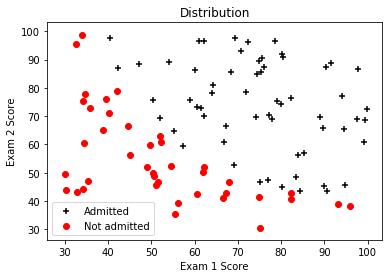

In [299]:
# Plot the positive and negative points
positives = train_data[train_data[:,-1] == 1]
negatives = train_data[train_data[:,-1] == 0]

fig = plt.figure()  
ax1 = fig.add_subplot(1, 1, 1)  
 
ax1.set_title('Distribution')  
plt.xlabel('Exam 1 Score')   
plt.ylabel('Exam 2 Score') 

plt.scatter(positives[:,0], positives[:,1], color='black', marker='+')
plt.scatter(negatives[:,0], negatives[:,1], color='red', marker='o')
plt.legend(('Admitted', 'Not admitted'), loc='best')

plt.show()

In [300]:
def hypothesis(X, theta):
    return 1 / (1 + np.exp(-np.matmul(X, theta)))
  
def compute_loss(X, Y, theta):
    H = hypothesis(X, theta)
    return np.sum(-np.matmul(Y.T, np.log(H)) - np.matmul((1 - Y).T, np.log(1 - H))) / len(X)

# Training
X = train_data[:,:-1]
X = np.c_[np.ones(len(X)), X]
Y = np.c_[train_data[:,-1]]
# print(X.shape, Y.shape)
theta = np.zeros([3, 1])
epoch = 10
# learning_rate = 0.001
losses = np.array([])
for i in range(epoch):
    losses = np.append(losses, compute_loss(X, Y, theta))
#     print(X)
    H = hypothesis(X, theta)
#     print(H)
    ## Gradient descend is very slow
#     delta = np.matmul((H - Y).T, X) / len(X)
#     theta -= learning_rate * delta.T
    # Use Newton method instead
    gradient = np.matmul((H - Y).T, X) / len(X)
#     print(gradient)
    # Refer https://zhuanlan.zhihu.com/p/63305895 to know how to compute Hessian matrix
    hessian = np.matmul(np.matmul(X.T, np.diag(H.ravel() * (1 - H).ravel())), X) / len(X)
#     print(hessian)
    delta = np.matmul(gradient, np.linalg.inv(hessian))
    theta -= delta.T
    
print(losses[0], losses[-1])

0.6931471805599452 0.20349770158943997


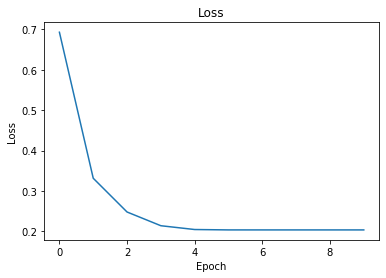

In [301]:
# Plot the loss
fig = plt.figure()  
ax1 = fig.add_subplot(1, 1, 1)  
 
ax1.set_title('Loss')  
plt.xlabel('Epoch')   
plt.ylabel('Loss') 

plt.plot(range(len(losses)), losses)

plt.show()

In [302]:
# Test one sample
test_x = np.array([1, 45, 85])
# predict1 = 1 / (1 + np.exp(-np.matmul(test_x, theta)))
predict1 = hypothesis(test_x, theta);
print(predict1)

[0.77629069]


#### How to draw decision boundary?
Since the point located at the decision boundary satisify:
$$ h_\theta(z) = \frac{1}{(1 + e^{-z})} = 0.5 $$
where $z = \theta_0 + \theta_1x1 + \theta_2x2$, then:
$$ 1 + e^{-z} = 2 $$
$$ e^z = 1 $$
$$ z = \theta_0 + \theta_1x_1 + \theta_2x_2 = 0 $$
$$ x_2 = \frac{-\theta_0 - \theta_1x_1}{\theta_2} $$



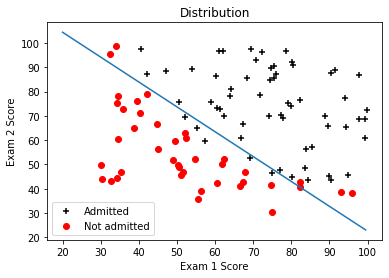

In [304]:
# Plot the decision boundary
positives = train_data[train_data[:,-1] == 1]
negatives = train_data[train_data[:,-1] == 0]

fig = plt.figure()  
ax1 = fig.add_subplot(1, 1, 1)  
 
ax1.set_title('Distribution')  
plt.xlabel('Exam 1 Score')   
plt.ylabel('Exam 2 Score') 

plt.scatter(positives[:,0], positives[:,1], color='black', marker='+')
plt.scatter(negatives[:,0], negatives[:,1], color='red', marker='o')
plt.legend(('Admitted', 'Not admitted'), loc='best')

x1 = np.arange(20, 100, 0.5)
x2 = (-theta[0] - theta[1] * x1) / theta[2]
plt.plot(x1, x2)

plt.show()

###   Regularized logistic regression

In [305]:
train_data = np.loadtxt("./ex2data2.txt", delimiter=",")
print(train_data[:5,:])


[[ 0.051267  0.69956   1.      ]
 [-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]]


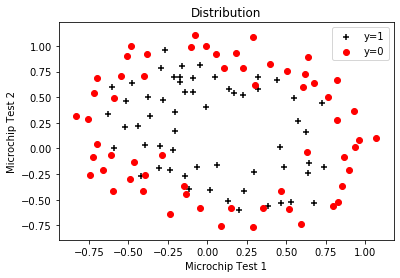

In [306]:
positives = train_data[train_data[:,-1] == 1]
negatives = train_data[train_data[:,-1] == 0]

fig = plt.figure()  
ax1 = fig.add_subplot(1, 1, 1)  
 
ax1.set_title('Distribution')  
plt.xlabel('Microchip Test 1')   
plt.ylabel('Microchip Test 2') 

plt.scatter(positives[:,0], positives[:,1], color='black', marker='+')
plt.scatter(negatives[:,0], negatives[:,1], color='red', marker='o')
plt.legend(('y=1', 'y=0'), loc='best')

plt.show()

In [307]:
Y = np.c_[train_data[:,-1]]

# Polynominal features
def map_features(data):
    data = np.c_[np.ones(len(data)), data]
    for i in range(2, 6 + 1):
        for j in range(0, i + 1):
            new_feature = ((data[:,1]**j) * (data[:,2])**(i - j)).reshape(-1,1)
    #         print(new_feature.shape)
            data = np.hstack((data, new_feature))
    return data
X = map_features(train_data[:,:-1])
print(X[:1,:])

[[1.00000000e+00 5.12670000e-02 6.99560000e-01 4.89384194e-01
  3.58643425e-02 2.62830529e-03 3.42353606e-01 2.50892595e-02
  1.83865725e-03 1.34745327e-04 2.39496889e-01 1.75514423e-02
  1.28625106e-03 9.42624411e-05 6.90798869e-06 1.67542444e-01
  1.22782870e-02 8.99809795e-04 6.59422333e-05 4.83255257e-06
  3.54151856e-07 1.17205992e-01 8.58939846e-03 6.29470940e-04
  4.61305487e-05 3.38066048e-06 2.47750473e-07 1.81563032e-08]]


#### Use normal logistic regression will overfit

In [377]:
def hypothesis(X, theta):
    return 1 / (1 + np.exp(-np.matmul(X, theta)))
  
def compute_loss(X, Y, theta):
    H = hypothesis(X, theta)
    return np.sum(-np.matmul(Y.T, np.log(H)) - np.matmul((1 - Y).T, np.log(1 - H))) / len(X)

theta = np.zeros([X.shape[1], 1])
epoch = 20
losses = np.array([])
for i in range(epoch):
    losses = np.append(losses, compute_loss(X, Y, theta))
    H = hypothesis(X, theta)
    # Use Newton method
    gradient = np.matmul((H - Y).T, X) / len(X)
    hessian = np.matmul(np.matmul(X.T, np.diag(H.ravel() * (1 - H).ravel())), X) / len(X)
    delta = np.matmul(gradient, np.linalg.inv(hessian))
    theta -= delta.T
    
print(losses[0], losses[-1])

0.6931471805599453 0.21929040139425868


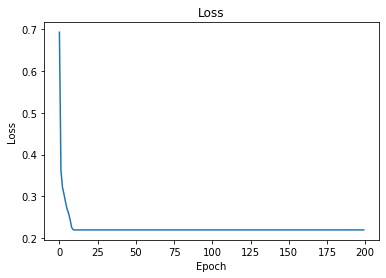

In [375]:
fig = plt.figure()  
ax1 = fig.add_subplot(1, 1, 1)  
 
ax1.set_title('Loss')  
plt.xlabel('Epoch')   
plt.ylabel('Loss') 

plt.plot(range(len(losses)), losses)

plt.show()

/Users/yuanhang/miniconda3/envs/simclr/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


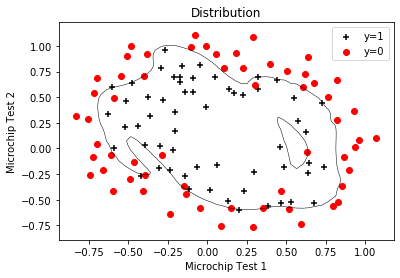

In [376]:
positives = train_data[train_data[:,-1] == 1]
negatives = train_data[train_data[:,-1] == 0]

fig = plt.figure()  
ax1 = fig.add_subplot(1, 1, 1)  
 
ax1.set_title('Distribution')  
plt.xlabel('Microchip Test 1')   
plt.ylabel('Microchip Test 2') 

plt.scatter(positives[:,0], positives[:,1], color='black', marker='+')
plt.scatter(negatives[:,0], negatives[:,1], color='red', marker='o')
plt.legend(('y=1', 'y=0'), loc='best')

x1 = np.linspace(X[:, 1].min(), X[:, 1].max())
x2 = np.linspace(X[:, 2].min(), X[:, 2].max())
xx1, xx2 = np.meshgrid(x1, x2)
# print(map_features(np.c_[x1, x2]).ravel().shape, theta.shape)
h = hypothesis(map_features(np.c_[xx1.ravel(), xx2.ravel()]), theta)

plt.contour(xx1, xx2, h.reshape(xx1.shape), [0.5], colors='black', linewidths=.5)
plt.show()

#### Use regularized logistic regression will fit better

In [369]:
lamb = 0.3

def compute_loss_reg(X, Y, theta, lamb=0.1):
    H = hypothesis(X, theta)
    return np.sum(-np.matmul(Y.T, np.log(H)) - np.matmul((1 - Y).T, np.log(1 - H))) / len(X) + lamb * np.sum(theta**2) / (2 * len(X))

theta = np.zeros([X.shape[1], 1])
epoch = 40000
losses = np.array([])
learning_rate = 0.01
for i in range(epoch):
    losses = np.append(losses, compute_loss_reg(X, Y, theta, lamb))
    H = hypothesis(X, theta)
    # Use Gradient descend
    gradient = np.matmul((H - Y).T, X) / len(X)
    gradient += lamb * theta.T / len(X)
    gradient[0] -= lamb * theta[0] / len(X)
    delta = learning_rate * gradient
    theta -= delta.T
    
print(losses[0], losses[-1])

0.6931471805599453 0.47251192054627267


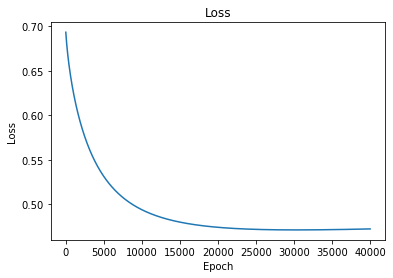

In [370]:
fig = plt.figure()  
ax1 = fig.add_subplot(1, 1, 1)  
 
ax1.set_title('Loss')  
plt.xlabel('Epoch')   
plt.ylabel('Loss') 

plt.plot(range(len(losses)), losses)

plt.show()

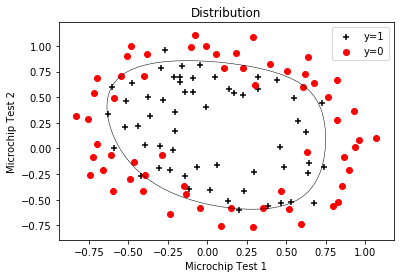

In [371]:
positives = train_data[train_data[:,-1] == 1]
negatives = train_data[train_data[:,-1] == 0]

fig = plt.figure()  
ax1 = fig.add_subplot(1, 1, 1)  
 
ax1.set_title('Distribution')  
plt.xlabel('Microchip Test 1')   
plt.ylabel('Microchip Test 2') 

plt.scatter(positives[:,0], positives[:,1], color='black', marker='+')
plt.scatter(negatives[:,0], negatives[:,1], color='red', marker='o')
plt.legend(('y=1', 'y=0'), loc='best')

x1 = np.linspace(X[:, 1].min(), X[:, 1].max())
x2 = np.linspace(X[:, 2].min(), X[:, 2].max())
xx1, xx2 = np.meshgrid(x1, x2)
# print(map_features(np.c_[x1, x2]).ravel().shape, theta.shape)
h = hypothesis(map_features(np.c_[xx1.ravel(), xx2.ravel()]), theta)

plt.contour(xx1, xx2, h.reshape(xx1.shape), [0.5], colors='black', linewidths=.5)
plt.show()